# Video Game Sales Analysis Project
## Project Overview

In this project, I analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, I used this information to help plan future advertising campaigns.


In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [ ]:
# Load the dataset
df=pd.read_csv('/datasets/games.csv')

In [ ]:
# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Check for duplicate entries
df.duplicated().sum()

0

CHECKED FOR DUPLICATE ENTRIES, THERE ARE NONE.

### Key Questions to Answer:
- What's the total number of records in our dataset? At this initial moment, there are 16715 total records.
- What data types are present in each column? The data types present are object & float64.
- Are there any obvious issues with the data? Yes, there are several obvious issues. Missing Data: We are missing the full 16715 in the columns: Name, Year_of_Release and Genre. We will need to see what percentage is missing and if we remove the rows with missing data, how much it will affect our data. Later on in the project, I discover it's a small percentage, so I choose to drop those rows.
I also noticed problems with the columns: Critic_Score, User_Score,  Rating.
These 3 columns are missing data, I need to work on these columns (without distorting the data too much) and fill in the missing scores and ratings. This would mean finding a good median and mode to fill the missing values. 
- Do we see any immediate patterns or anomalies? The column User_Score is not a number. It should be converted to float64, like the other score columns.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b> </a>

You are not missing the full 16715 rows in the columns "Name", "Year_Of_Release" and "Genre"! if you print a couple rows you can see you have values for those columns!
    
</div>

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [ ]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [ ]:
# Verify the changes
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job standardizing the column names!
    
</div>

### 2.2 Data Type Conversion

In [ ]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Make changes to data types if necessary
# this code will convert valid numeric strings (like "8.5", "7") to actual numbers (floats or ints) and
# Replace non-numeric values (like "tbd", "N/A", or any text) with NaN (null), because of errors='coerce'.

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['year_of_release']=pd.to_numeric(df['year_of_release'],errors='coerce').astype('Int64')

#I will test that this worked
print(df['user_score'].dtype)
print(df['year_of_release'].dtype)
# Describe the columns where the data types have been changed and why.

float64
Int64


The column user_score was changed from string(aka object) to float64 
like all of the other scores.
The column year_of_release was changed from float64 data type to Int64, because year is an integer not a decimal.


In [ ]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

ANY DATA THAT WAS TBD OR NOT A NUMBER IS REPLACED WITH NaN (null). MY GOAL IS TO AVOID DISTORTING THE DATA TOO MUCH, AND BASE MY FINDINGS OFF OF AS RELEVANT DATA AS POSSIBLE. 


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking good!
    
</div>

### 2.3 Handling Missing Values

In [ ]:
#Analyze Missing values: Missing Data: Name, Year_of_Release,  Genre, Critic_Score, User_Score,  Rating   

In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

THIS DISPLAYS THAT THE NAN ITEMS THE COLUMNS THAT I POINTED OUT EARLIER NEED TO BE ASSESSED.

In [ ]:
# Calculate percentage of missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent)

total_missing_percent = df.isnull().sum().sum() / df.size * 100
print(f"Total missing percentage: {total_missing_percent:.2f}%")

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64
Total missing percentage: 13.46%


THE FACT THAT THE PERCENTAGE IS SO SMALL FOR THE COLUMNS NAME, YEAR, AND GENRE, HELPS ME TO DECIDE TO DROP THE NULL ROWS, AND KNOW THAT IT WILL NOT DISTORT THE DATA IN AN EXTREME MANNER.

In [ ]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
#drop the null values with low percentage that won't affect data with dropna()
df = df.dropna(subset=['name', 'year_of_release', 'genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [ ]:
#use median for critic and user score and mode for rating(string) with fillna()
#filter with .loc

df.loc[df['critic_score'].isna(), 'critic_score'] = (df.groupby(['genre', 'year_of_release'])['critic_score'].transform("median"))

# critic_median = df['critic_score'].median()
# df['critic_score']=df['critic_score'].fillna(value=critic_median)

df.loc[df['user_score'].isna(), 'user_score'] = (df.groupby(['genre', 'year_of_release'])['user_score'].transform("median"))
# user_median = df['user_score'].median()
# df['user_score']=df['user_score'].fillna(value=user_median)

#optional:df['rating'].mode()[0]
rating_mode=df['rating'].mode()[0]
df['rating']=df['rating'].fillna(value=rating_mode)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     15513 non-null  float64
 9   user_score       15496 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 2.0+ MB


I USED A SPECIAL CODE TO INSERT A MEDIAN USING GROUPBY FOR THE YEAR AND GENRE, KEEPING THE DATA AS UP-TO-DATE AS POSSIBLE. I USED MODE TO FILL IN ANY MISSING RATINGS.

In [ ]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

THE VALUES ARE MISSING BECAUSE I'D IMAGINE THEY WERE NOT ABLE TO GET SCORES FOR ALL OF THE GAMES, MAYBE THEY WERE UNABLE TO AT THE TIME—POSSIBLY IN THE EARLIER YEARS, OR MISPLACED THE DATA.

IN THIS SECTION I WORK WITH THE DATA AND USE THE MEDIAN WITH USER AND CRITIC SCORE, HOWEVER USE GROUPBY SO IT WILL FILL THE COMMON MEDIAN FOR EACH SEPARATE GENRE AND YEAR TO BE MORE ON POINT. BECAUSE SOME DATA IS MISSING THE YEAR AND GENRE, SOME DATA WILL STILL BE NULL. IN THIS CASE, I ASSUMED THAT THESE SHOULD BE LEFT NULL SO AS TO NOT DISTORT THE DATA. 

### 2.4 Calculate Total Sales

In [ ]:
# Calculate total sales across all regions and put them in a different column
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,94.0,8.7,E,31.38


WE NOW HAVE AN ADDITIONAL COLUMN, TOTAL_SALES, WHICH WILL HELP US SEE OUR OVERALL SALES FOR EACH GAME, AND WILL BE HELPFUL IN FUTURE CALCULATIONS.

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [ ]:
# Create a DataFrame with game releases by year
#Extra info-if I need to see names
game_by_year = df[['name', 'year_of_release']].sort_values('year_of_release')
print(game_by_year)

#This is what they want to see:
game_counts = df.groupby('year_of_release')['name'].count().reset_index()
game_counts.columns = ['year_of_release', 'game_count']
print(game_counts)


                                      name  year_of_release
1764                               Kaboom!             1980
546                        Missile Command             1980
1968                              Defender             1980
6300                                Bridge             1980
5360                               Freeway             1980
...                                    ...              ...
10821               Skylanders Imaginators             2016
10825             One Piece: Burning Blood             2016
12156          Assassin's Creed Chronicles             2016
16248  Azure Striker Gunvolt: Striker Pack             2016
16714                  Winning Post 8 2016             2016

[16444 rows x 2 columns]
    year_of_release  game_count
0              1980           9
1              1981          46
2              1982          36
3              1983          17
4              1984          14
5              1985          14
6              1986          2

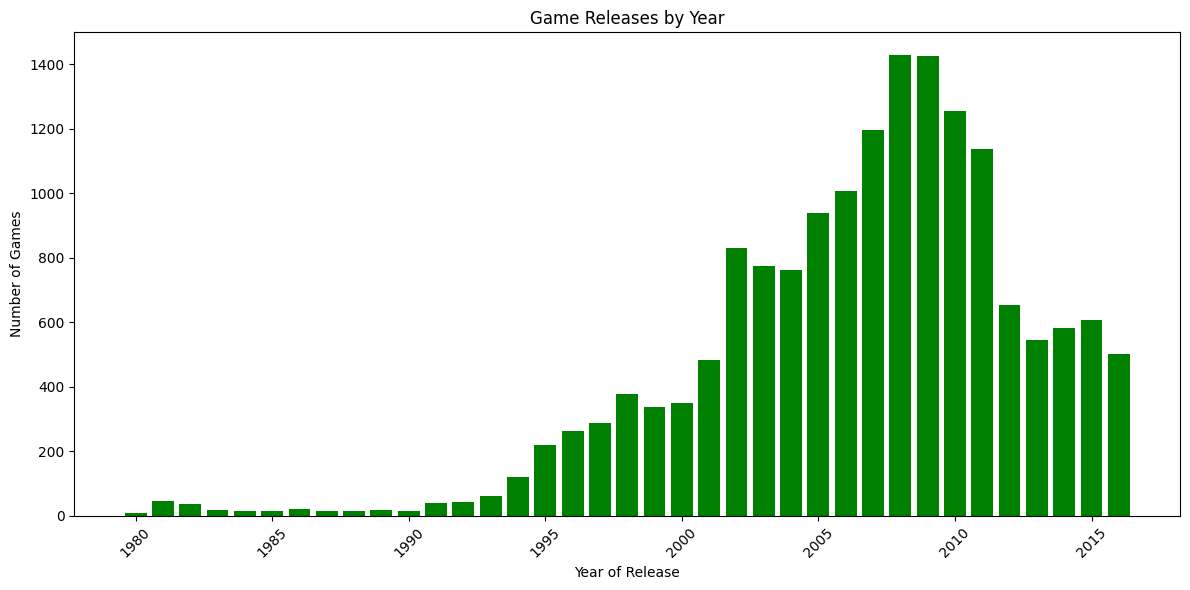

In [ ]:
# Visualize the distribution of games across years

# This was the code I used to count games per year
# game_counts = df.groupby('year_of_release')['name'].count().reset_index()
# game_counts.columns = ['year_of_release', 'game_count']

# Bar Plot
plt.figure(figsize=(12,6))
plt.bar(game_counts['year_of_release'], game_counts['game_count'], color='green')

plt.title('Game Releases by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Display summary statistics for each year
summary_by_year = df.groupby('year_of_release').describe()
print(summary_by_year)

                na_sales                                                   \
                   count      mean       std   min     25%    50%     75%   
year_of_release                                                             
1980                 9.0  1.176667  1.282624  0.22  0.3200  0.720  1.0700   
1981                46.0  0.726087  0.730885  0.12  0.2925  0.435  0.8925   
1982                36.0  0.747778  1.172248  0.13  0.3150  0.500  0.7225   
1983                17.0  0.456471  0.278903  0.01  0.3100  0.430  0.5100   
1984                14.0  2.377143  7.089785  0.00  0.0450  0.345  0.7700   
1985                14.0  2.409286  7.689309  0.00  0.0000  0.285  0.6025   
1986                21.0  0.595238  0.881542  0.00  0.0000  0.320  0.7100   
1987                16.0  0.528750  0.653094  0.00  0.1350  0.370  0.4875   
1988                15.0  1.591333  2.630154  0.00  0.1000  0.590  1.3700   
1989                17.0  2.655882  5.893720  0.00  0.1400  0.660  0.9600   

### Questions to Consider:
- Which years show significant numbers of game releases? Anything after year 2007 is significant, there's a peak at 2008 and 2009. Between 2012 and 2016 the sales seem pretty consistant.
- Are there any notable trends or patterns in the number of releases? Between 2012 and 2016, about 600 games were released every year.
- Is there enough recent data to make predictions for 2017? Yes. You can see that recently there is a trend of consistant game sales, and we have a lot of beneficial information on all of these games to make predictions.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [ ]:
# Calculate total sales by platform and year
sales_by_platform_year = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(sales_by_platform_year)

    platform  year_of_release  total_sales
0       2600             1980        11.38
1       2600             1981        35.68
2       2600             1982        28.88
3       2600             1983         5.84
4       2600             1984         0.27
..       ...              ...          ...
233       XB             2008         0.18
234     XOne             2013        18.96
235     XOne             2014        54.07
236     XOne             2015        60.14
237     XOne             2016        26.15

[238 rows x 3 columns]


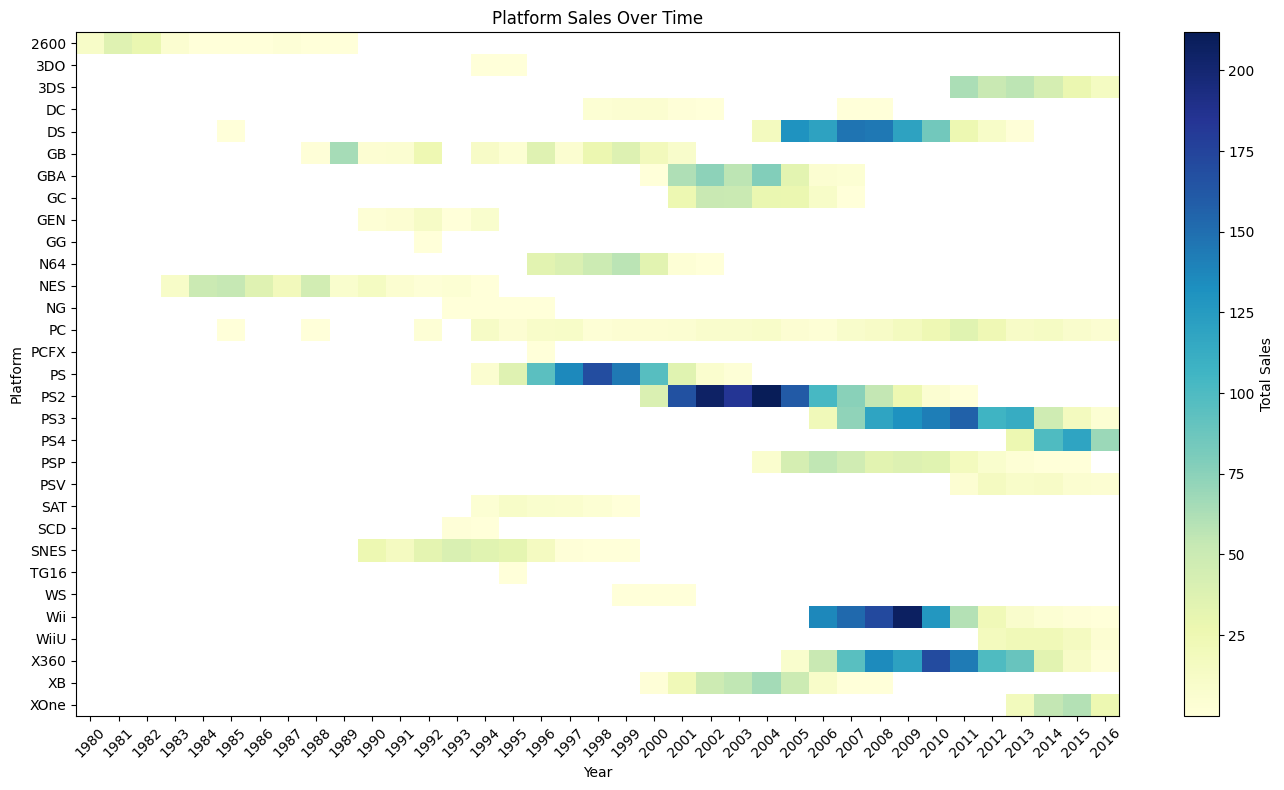

In [ ]:
# Create a heatmap of platform sales over time
heatmap_data = sales_by_platform_year.pivot(index='platform', columns='year_of_release', values='total_sales')

# Plot the heatmap using Matplotlib
plt.figure(figsize=(14,8))
plt.imshow(heatmap_data, aspect='auto', cmap='YlGnBu')

# Add labels
plt.title('Platform Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)

# Add colorbar
plt.colorbar(label='Total Sales')

plt.tight_layout()
plt.show()

In [ ]:
# Identify platforms with declining sales
#All platform names
print(df['platform'].unique())
#Platforms with declining sales: 3DS, DS, GBA, PS, PS2, PS3, PSP, WII, X360

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


## which ones

### Questions to Consider:
- Which platforms show consistent sales over time? PC, WIIU, PSV, PS4
- Can you identify platforms that have disappeared from the market? 'PS3'  'SNES' 'PS4' '3DS' 
  'XB' 'PC' '2600' 'PSV' 'SAT' 'SCD' 'WS' 'TG16' 
- What's the typical lifecycle of a gaming platform? 10 Years

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [ ]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

relevant_years = [2012, 2013, 2014, 2015, 2016]
df_relevant = df[df['year_of_release'].isin(relevant_years)]
df_relevant.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,75.0,6.2,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.5,7.6,E,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<AxesSubplot:>

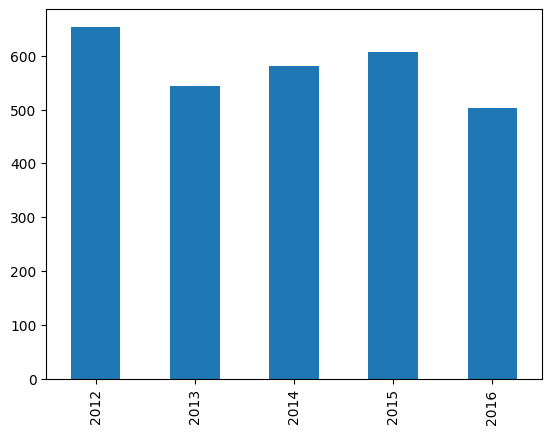

In [ ]:
df_relevant['year_of_release'].value_counts().sort_index().plot(kind='bar')

This visual confirms that the bulk of data lies within this range.

In [ ]:
outside_range_count = df_relevant[(df_relevant['year_of_release'] < 2012) | (df_relevant['year_of_release'] > 2016)].shape[0]
print(outside_range_count)
within_range_count = df_relevant[(df_relevant['year_of_release'] >= 2012) & (df_relevant['year_of_release'] <= 2016)].shape[0]
print(within_range_count)

0
2886


This shows that the number of entries outside this range is minimal and the years before 1995 or after 2016 may have sparse or missing data.

The chosen period covers the transition from physical to digital distribution, the rise of global franchises, and the emergence of mobile gaming.
It’s a historically rich window for understanding trends.

### Document Your Decision:
- What years did you select and why? This period includes the most relevant years, the last 5 years. The technology in the industry wouldve been much different in earlier years, and the data wouldn't be relevant to our questions.
- How does this period reflect current market conditions? The past 5 years, you can see game releases as consistant, and we can draw conclusions from the collected data.
- What factors influenced your decision? You can see game releases in the graph are consistent for the last 5 years. Also looking at the heat map, you can see certain consoles are doing consistantly well today and others are not or non-existant so irrelevant to what we are asking.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [ ]:
df_relevant.head()
print(list(df_relevant.columns))

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']


In [ ]:
# Analyze platform sales trends
#GLOBAL OVERVIEW
df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

In [ ]:
#REGIONAL TRENDS
df_relevant.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,55.31,42.64,87.79,8.87
DS,4.59,3.53,3.72,0.71
PC,19.12,37.76,0.00,5.77
PS3,103.38,106.86,35.29,43.26
PS4,108.74,141.09,15.96,48.35
PSP,0.13,0.42,10.47,0.17
PSV,10.98,11.36,21.04,5.80
Wii,17.45,11.92,3.39,2.61
WiiU,38.10,25.13,13.01,5.95


In [ ]:
# Sort platforms by total sales
platform_sales = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform_sales_df = platform_sales.reset_index()
platform_sales_df.columns = ['platform', 'total_sales']
print(platform_sales_df)

   platform  total_sales
0       PS4       314.14
1       PS3       288.79
2      X360       236.54
3       3DS       194.61
4      XOne       159.32
5      WiiU        82.19
6        PC        62.65
7       PSV        49.18
8       Wii        35.37
9        DS        12.55
10      PSP        11.19


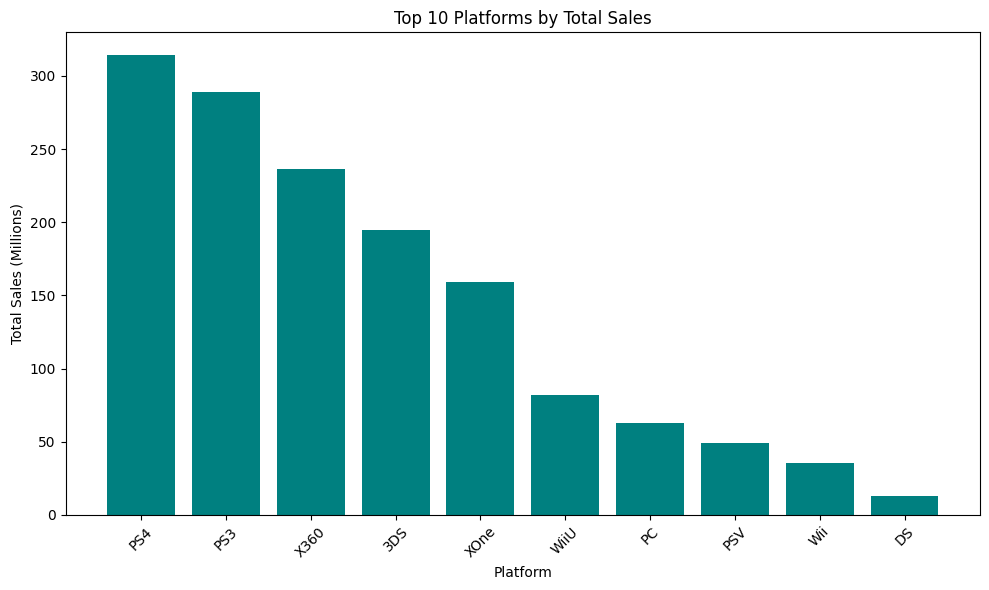

In [ ]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
import matplotlib.pyplot as plt

# Calculate total sales by platform
platform_sales = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Select top N platforms (e.g., top 10)
top_platforms = platform_sales.head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_platforms.index, top_platforms.values, color='teal')

plt.title('Top 10 Platforms by Total Sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate year-over-year growth for each platform
#sum sales by platform and year
platform_year_sales = df_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Sort values to ensure correct order
platform_year_sales = platform_year_sales.sort_values(by=['platform', 'year_of_release'])

# Calculate YoY growth per platform
platform_year_sales['yoy_growth'] = platform_year_sales.groupby('platform')['total_sales'].pct_change()

# format as percentage
platform_year_sales['yoy_growth_percent'] = platform_year_sales['yoy_growth'] * 100

print(platform_year_sales)

   platform  year_of_release  total_sales  yoy_growth  yoy_growth_percent
0       3DS             2012        51.36         NaN                 NaN
1       3DS             2013        56.57    0.101441           10.144081
2       3DS             2014        43.76   -0.226445          -22.644511
3       3DS             2015        27.78   -0.365174          -36.517367
4       3DS             2016        15.14   -0.455004          -45.500360
5        DS             2012        11.01         NaN                 NaN
6        DS             2013         1.54   -0.860127          -86.012716
7        PC             2012        23.22         NaN                 NaN
8        PC             2013        12.38   -0.466839          -46.683893
9        PC             2014        13.28    0.072698            7.269790
10       PC             2015         8.52   -0.358434          -35.843373
11       PC             2016         5.25   -0.383803          -38.380282
12      PS3             2012       107

In [ ]:
print(platform_year_sales[['platform', 'year_of_release', 'total_sales', 'yoy_growth_percent']].head(20))

   platform  year_of_release  total_sales  yoy_growth_percent
0       3DS             2012        51.36                 NaN
1       3DS             2013        56.57           10.144081
2       3DS             2014        43.76          -22.644511
3       3DS             2015        27.78          -36.517367
4       3DS             2016        15.14          -45.500360
5        DS             2012        11.01                 NaN
6        DS             2013         1.54          -86.012716
7        PC             2012        23.22                 NaN
8        PC             2013        12.38          -46.683893
9        PC             2014        13.28            7.269790
10       PC             2015         8.52          -35.843373
11       PC             2016         5.25          -38.380282
12      PS3             2012       107.36                 NaN
13      PS3             2013       113.25            5.486215
14      PS3             2014        47.76          -57.827815
15      

IN TERMS OF SALES, PS2 AND X360 WERE THE TOP 10 PLATFORMS.

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

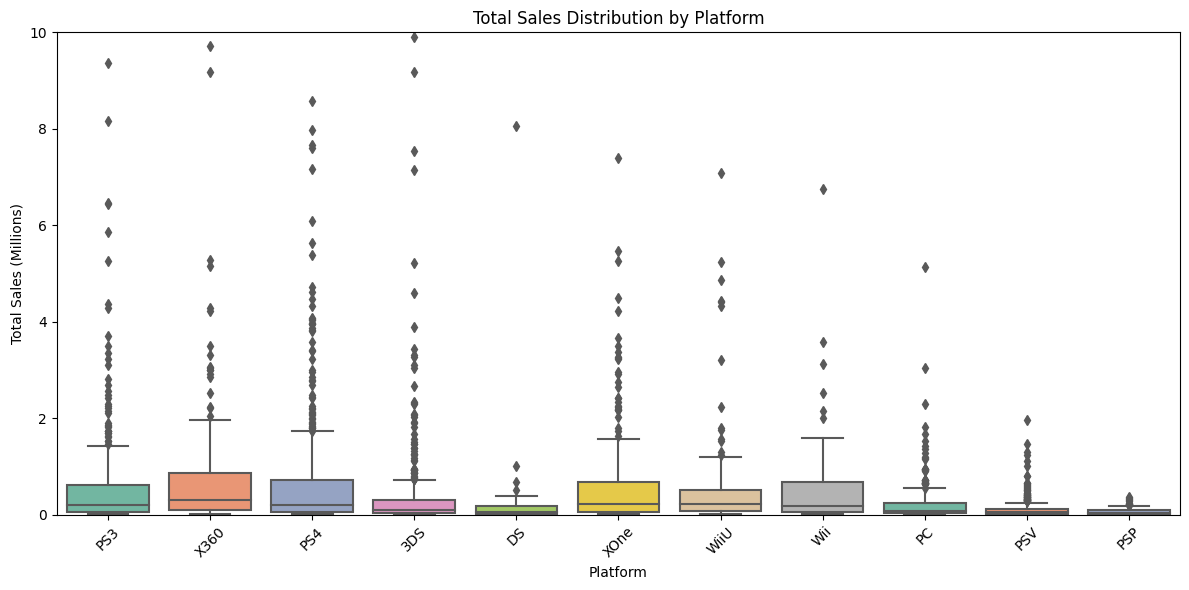

In [ ]:
# Create box plot of sales by platform
plt.figure(figsize=(12,6))
sns.boxplot(data=df_relevant, x='platform', y='total_sales', palette='Set2')

plt.title('Total Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.ylim(0,10)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate detailed statistics for each platform

platform_stats = df_relevant.groupby('platform')['total_sales'].describe()
print(platform_stats)

          count      mean       std   min     25%   50%     75%    max
platform                                                              
3DS       396.0  0.491439  1.387161  0.01  0.0400  0.11  0.3125  14.60
DS         31.0  0.404839  1.439245  0.01  0.0200  0.05  0.1850   8.06
PC        250.0  0.250600  0.494640  0.01  0.0300  0.08  0.2400   5.14
PS3       493.0  0.585781  1.462855  0.01  0.0500  0.20  0.6100  21.05
PS4       392.0  0.801378  1.609456  0.01  0.0600  0.20  0.7300  14.63
PSP       173.0  0.064682  0.071296  0.01  0.0200  0.03  0.0900   0.36
PSV       411.0  0.119659  0.203011  0.01  0.0200  0.05  0.1200   1.96
Wii        54.0  0.655000  1.165447  0.01  0.0625  0.18  0.6875   6.76
WiiU      147.0  0.559116  1.058836  0.01  0.0800  0.22  0.5250   7.09
X360      292.0  0.810068  1.712069  0.01  0.1000  0.31  0.8700  16.27
XOne      247.0  0.645020  1.036139  0.01  0.0600  0.22  0.6850   7.39


I NOTICED THAT IN TERMS OF TOTAL SALES, THE PLATFORM PSP WAS NOT WIDELY DISTRIBUTED, AND THE PS3 WAS THE OPPOSITE.
THE HIGHEST AVERAGE SALES WERE THE PS4 AND X360, WITH AVERAGE SALES OF .80 AND .81 MILLION UNITS.
THE TOP-SELLING INDIVIDUAL GAME IS PS3, IT HAS THE HIGHEST MAXIMUM SALE AT 21.05 MILLION, FOLLOWED BY X360 AND PS4.

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [ ]:
# Choose a popular platform based on your previous analysis -PS4
df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,75.0,6.2,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.5,7.6,E,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

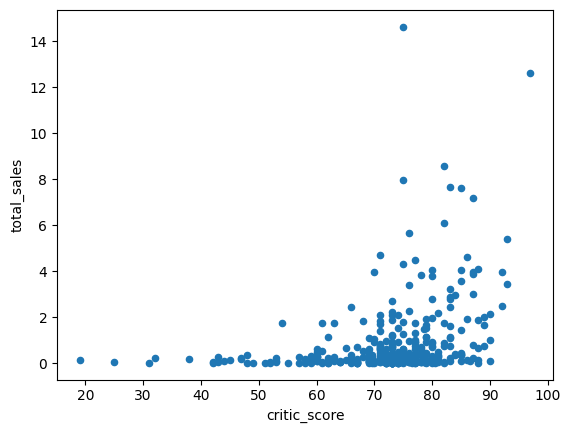

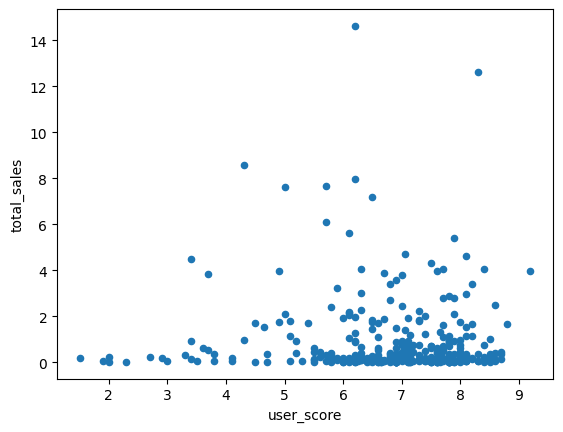

In [ ]:
# Create scatter plots for both critic and user scores FOR PS4
df_PS4 = df_relevant[df_relevant['platform'] == 'PS4']
df_PS4.plot(x='critic_score',y='total_sales',kind='scatter') 
df_PS4.plot(x='user_score',y='total_sales',kind='scatter') 

In [ ]:
# Critic Scores
# User Scores
# Calculate correlations between sales and scores 
display(df_PS4['critic_score'].corr(df_PS4['total_sales']))

0.31004296545511173

THE CORRELATION BETWEEN THE CRITIC SCORE AND TOTAL SALES OF PS4 IS POSITIVE.
THIS MEANS THAT GAMES WITH HIGHER CRITIC RATINGS TEND TO SELL MORE.

In [ ]:
display(df_PS4['user_score'].corr(df_PS4['total_sales']))

-0.07904193454608814

THE CORRELATION BETWEEN THE USER SCORE AND TOTAL SALES OF PS4 IS NEGATIVE. PERHAPS GAMES THAT SELL WELL ON PS4 MAY NOT ALWAYS BE RATED HIGHLY BY USERS. OR MARKETING COULD DRIVE MORE SALES THAN USER FEEDBACK.

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [ ]:
# Find games released on multiple platforms:BELOW

In [ ]:
# Get the platforms each game is on
platforms_per_game = df_relevant.groupby('name')['platform'].unique()

# Convert to DF so you can use .str.len
platforms_df = platforms_per_game.reset_index()
platforms_df.columns = ['name', 'platforms']

# Add a column for how many platforms each game has
platforms_df['num_platforms'] = platforms_df['platforms'].str.len()

# Filter games with more than one platform
multi_platform_details = platforms_df[platforms_df['num_platforms'] > 1]

print(multi_platform_details)

                                     name        platforms  num_platforms
2                    Frozen: Olaf's Quest        [3DS, DS]              2
10             2014 FIFA World Cup Brazil      [PS3, X360]              2
12      3rd Super Robot Wars Z Jigoku Hen       [PS3, PSV]              2
13    3rd Super Robot Wars Z: Tengoku-Hen       [PSV, PS3]              2
16                          7 Days to Die      [PS4, XOne]              2
...                                   ...              ...            ...
1662     Zone of the Enders HD Collection      [PS3, X360]              2
1663                    Zoo Tycoon (2013)     [XOne, X360]              2
1664                   Zumba Fitness Core      [Wii, X360]              2
1666           Zumba Fitness: World Party      [XOne, Wii]              2
1668                        [Prototype 2]  [X360, PS3, PC]              3

[596 rows x 3 columns]


In [ ]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance

In [ ]:
new_df=df_relevant[df_relevant['name'].isin(multi_platform_details['name'])][['name', 'platform', 'total_sales']]

name
Grand Theft Auto V                56.58
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         24.16
Call of Duty: Advanced Warfare    21.97
FIFA 15                           17.37
FIFA 14                           16.46
FIFA 16                           16.30
FIFA Soccer 13                    15.97
Name: total_sales, dtype: float64


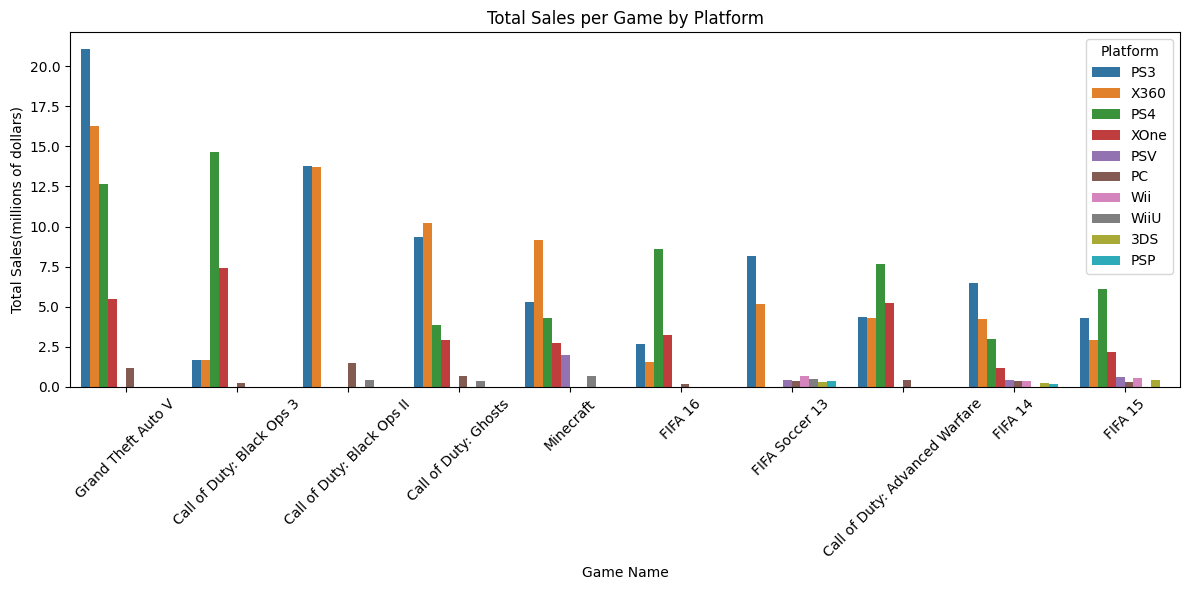

In [ ]:
sales_by_game = new_df.groupby('name')['total_sales'].sum()
top_games = sales_by_game.sort_values(ascending=False).head(10)
print(top_games)
filtered_df = df[df['name'].isin(top_games.index)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='name', y='total_sales', hue='platform')

plt.title('Total Sales per Game by Platform')
plt.xlabel('Game Name')
plt.ylabel('Total Sales(millions of dollars)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

IN TERMS OF SALES ACROSS PLATFORMS FOR GAMES, THE BARPLOT DISPLAYS THE TOP 10 GAMES WITH MULTIPLE PLATFORMS. THEY ARE COLOR CODED SO WE CAN SEE THE AMOUNT OF TOTAL SALES PER PLATFORM. GRAND THEFT AUTO HAD THE MOST OUTSTANDING SALES, AND PS3 HAD THE MOST SALES FOR THAT GAME. THE TOP PLATFORMS ARE PS3, PS4, AND X360, XONE IS ALSO QUITE SUCCESSFUL. IT WOULD BE A GOOD IDEA TO MARKET TO THESE PLATFORMS IN THE FUTURE.

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [ ]:
df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,75.0,6.2,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.5,7.6,E,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
# Analyze genre performance
genre_counts=df_relevant['genre'].value_counts().sort_values(ascending=False)


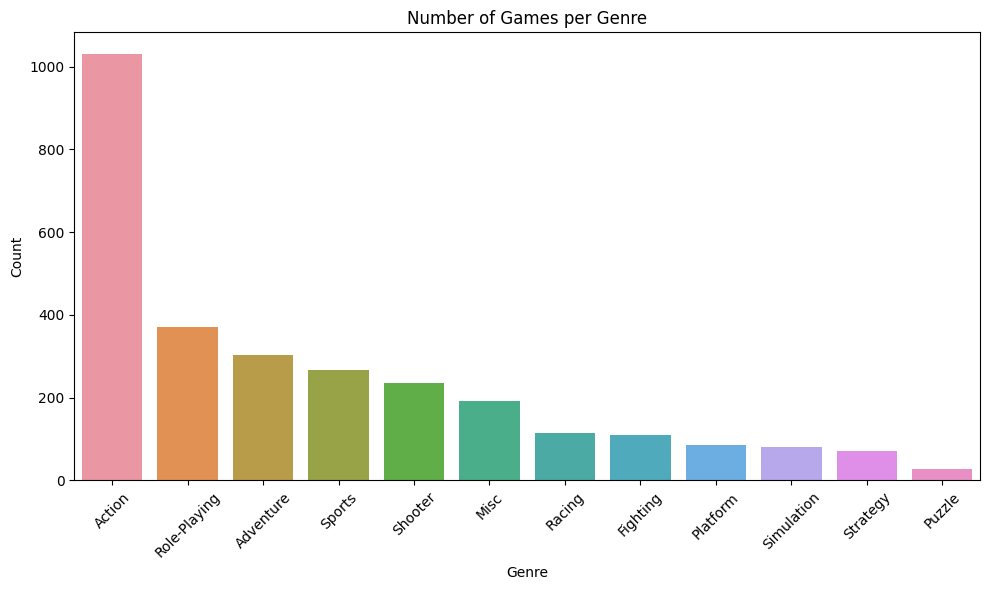

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)

plt.title('Number of Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sort genres by total sales
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

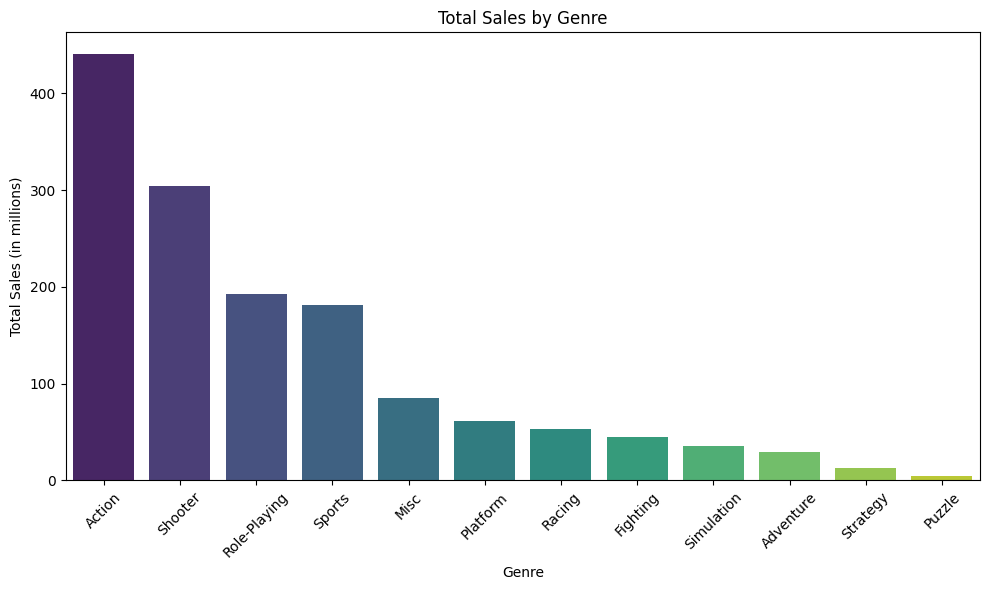

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')

plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate market share for each genre
df_relevant.groupby('genre')['total_sales'].sum()

genre
Action          441.12
Adventure        29.43
Fighting         44.49
Misc             85.04
Platform         61.00
Puzzle            4.89
Racing           53.50
Role-Playing    192.80
Shooter         304.73
Simulation       35.12
Sports          181.07
Strategy         13.34
Name: total_sales, dtype: float64

In [ ]:
market_share = df_relevant.groupby('genre')['total_sales'].sum() / df_relevant['total_sales'].sum() * 100
print(market_share)

genre
Action          30.495047
Adventure        2.034524
Fighting         3.075636
Misc             5.878896
Platform         4.216988
Puzzle           0.338050
Racing           3.698506
Role-Playing    13.328448
Shooter         21.066276
Simulation       2.427879
Sports          12.517542
Strategy         0.922207
Name: total_sales, dtype: float64


### Key Questions for Genre Analysis:
- Which genres consistently perform well? Action and roleplaying for total sales and number of games both are successful consistantly.
- Are there any genres showing recent growth or decline? Puzzle and strategy are hitting an all time low in the current years we are looking at.
- How does the average performance vary across genres? Action is skyrocketing compared to all of the other genres-in both sections that we are looking into, almost doubles in comparison to all of the other genres.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [ ]:
df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,75.0,6.2,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.5,7.6,E,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
# Function to analyze platform performance by region
regions = ['jp_sales', 'na_sales', 'eu_sales']

In [ ]:
# Analyze each region
df_relevant.groupby('platform')[regions].sum()


,jp_sales,na_sales,eu_sales
platform,,,
3DS,87.79,55.31,42.64
DS,3.72,4.59,3.53
PC,0.00,19.12,37.76
PS3,35.29,103.38,106.86
PS4,15.96,108.74,141.09
PSP,10.47,0.13,0.42
PSV,21.04,10.98,11.36
Wii,3.39,17.45,11.92
WiiU,13.01,38.10,25.13


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [ ]:
# Create a comparative platform analysis

platform
3DS     185.74
DS       11.84
PC       56.88
PS3     245.53
PS4     265.79
PSP      11.02
PSV      43.38
Wii      32.76
WiiU     76.24
X360    216.14
XOne    145.05
Name: total_sales, dtype: float64


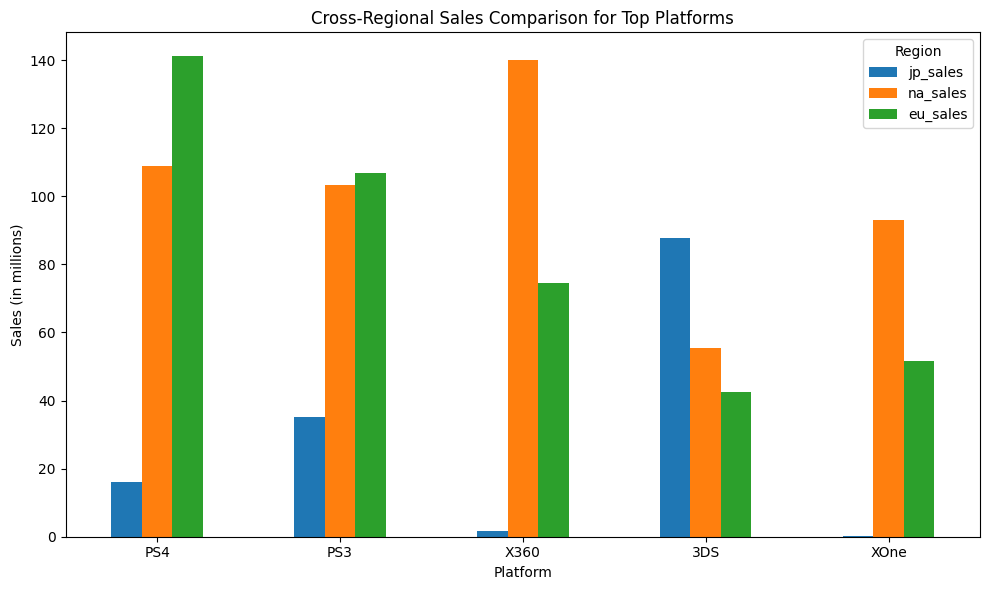

In [ ]:
# Visualize cross-regional comparison for top platforms

platform_sales = df_relevant.groupby('platform')[regions].sum()

# Calculate total sales across selected regions
platform_sales['total_sales'] = platform_sales.sum(axis=1)
print(platform_sales['total_sales'])

# Select top 5 platforms by total sales
top_platforms = platform_sales.sort_values('total_sales', ascending=False).head(5)

# Plot grouped bar chart
top_platforms.drop(columns='total_sales').plot(kind='bar', figsize=(10, 6))

plt.title('Cross-Regional Sales Comparison for Top Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=0)
plt.tight_layout()

IN TERMS OF REGION-PS3 PS4 GAME SALES WERE DID WELL IN EUROPE. X36O GAME SALES DID WELL IN NORTH AMERICA. AND 3DS GAMES DID THE MOST SALES IN JAPAN. SO THESE GAME PLATFORMS WOULD BE THE ONES THE MARKETING TEAM WOULD FOCUS ON FOR THESE SPECIFIC REGION. 

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [ ]:
# Function to analyze genre performance by region
regions = ['jp_sales', 'na_sales', 'eu_sales']
regional_genre_sales = df_relevant.groupby('genre')[regions].sum()

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [ ]:
# Create a comparative genre analysis
print(regional_genre_sales)

              jp_sales  na_sales  eu_sales
genre                                     
Action           52.80    177.84    159.34
Adventure         8.24      8.92      9.46
Fighting          9.44     19.79     10.79
Misc             12.86     38.19     26.32
Platform          8.63     25.38     21.41
Puzzle            2.14      1.13      1.40
Racing            2.50     17.22     27.29
Role-Playing     65.44     64.00     48.53
Shooter           9.23    144.77    113.47
Simulation       10.41      7.97     14.55
Sports            8.01     81.53     69.09
Strategy          2.88      4.23      5.17


genre
Action          389.98
Adventure        26.62
Fighting         40.02
Misc             77.37
Platform         55.42
Puzzle            4.67
Racing           47.01
Role-Playing    177.97
Shooter         267.47
Simulation       32.93
Sports          158.63
Strategy         12.28
Name: total_sales, dtype: float64


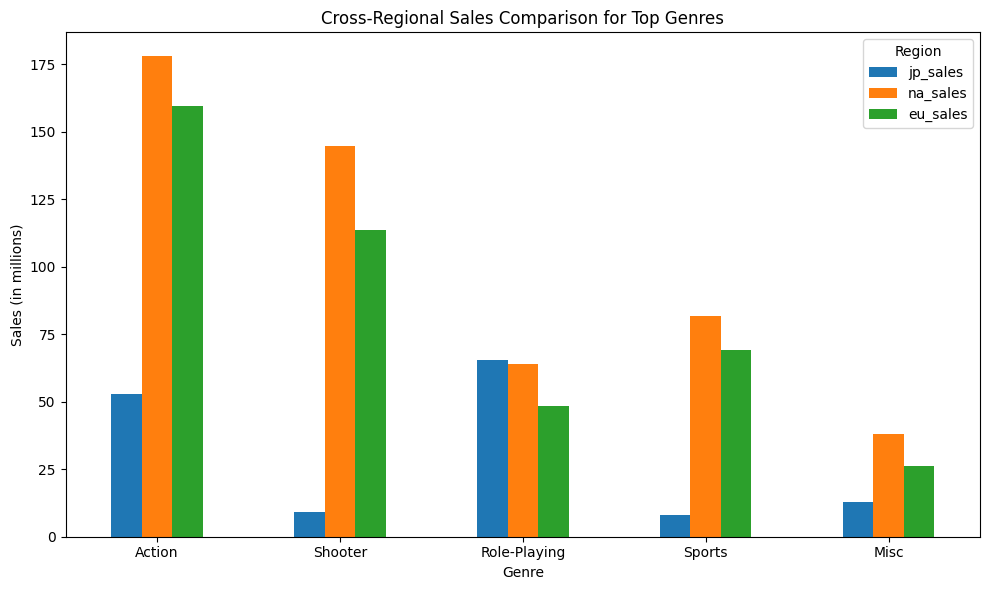

In [ ]:
regional_genre_sales['total_sales'] = regional_genre_sales.sum(axis=1)
print(regional_genre_sales['total_sales'])

# Select top 5 platforms by total sales
top_genres = regional_genre_sales.sort_values('total_sales', ascending=False).head(5)

# Plot grouped bar chart
top_genres.drop(columns='total_sales').plot(kind='bar', figsize=(10, 6))

plt.title('Cross-Regional Sales Comparison for Top Genres')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=0)
plt.tight_layout()

FOR GENRES PER REGION: ACTION DID THE BEST FOR ALL REGIONS, SO THAT WOULD BE WHAT THE MARKETING TEAM WOULD FOCUS ON, ESPECIALLY IN THE REGIONS NORTH AMERICA AND EUROPE. SHOOTER IS A CLOSE SECOND, HOWEVER THE REGIONS NA AND EU SHOULD BE FOCUSED ON, JAPAN DIDN'T MAKE MANY SALES. JAPAN MADE THE MOST SALES IN THE ROLE-PLAYING GENRE. SO YOU COULD ALSO TARGET THAT AREA. 

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [ ]:
# Function to analyze ESRB rating impact
regions = ['jp_sales', 'na_sales', 'eu_sales']
regional_ratings_sales = df_relevant.groupby('rating')[regions].sum()
print(regional_ratings_sales)

        jp_sales  na_sales  eu_sales
rating                              
E         137.17    217.68    204.53
E10+        8.19     75.70     55.37
M          21.20    231.57    193.96
T          26.02     66.02     52.96


In [ ]:
# Analyze ESRB impact for each region

rating
E       559.38
E10+    139.26
M       446.73
T       145.00
Name: total_sales, dtype: float64


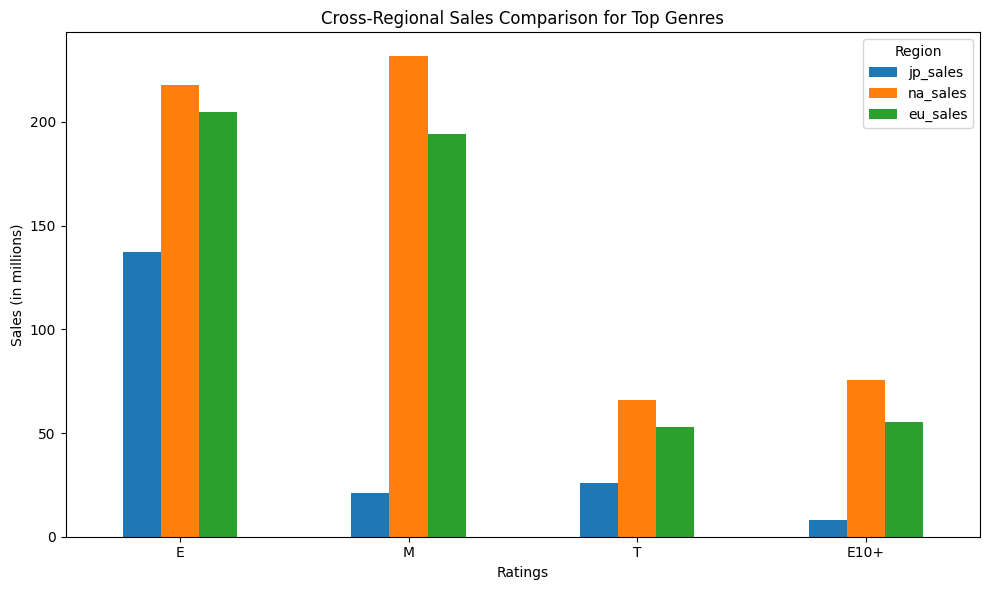

In [ ]:
regional_ratings_sales['total_sales'] = regional_ratings_sales.sum(axis=1)
print(regional_ratings_sales['total_sales'])

# Select top 5 platforms by total sales
top_ratings = regional_ratings_sales.sort_values('total_sales', ascending=False).head(5)

# Plot grouped bar chart
top_ratings.drop(columns='total_sales').plot(kind='bar', figsize=(10, 6))

plt.title('Cross-Regional Sales Comparison for Top Genres')
plt.xlabel('Ratings')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=0)
plt.tight_layout()

E AND M RATINGS ARE THE HIGHEST IN SALES (SO THOSE WOULD BE THE ONES TO FOCUS ON FOR MARKETING.

#Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same. There is no significant difference.

—Average user ratings for the Action and Sports genres are different. We reject the null hypothesis: Action and sports ratings are significantly different.

Set the *alpha* threshold value yourself. .05

Explain:

—How you formulated the null and alternative hypotheses 
null (H₀) "We can't reject the null hypothesis: No significant difference in Xbox and PC ratings."
I used the initial question(assumption) to base my null hypothesis off of, it makes it more clear when I get the result.

The null hypothesis (H₀) is: "We can't reject the null hypothesis: No significant difference action and sports in ratings."
If it is a difference, then we know we can reject the null hypothesis.

—What criteria you used to test the hypotheses~~,~~ and why
I USED A TWO-SAMPLE T-TEST TO COMPARE THE AVERAGE USER RATINGS BETWEEN XBOX AND PC, AND LATER, TO COMPARE THE AVERAGE USER RATINGS BETWEEN ACTION AND SPORTS GENRES.  THIS TEST WAS CHOSEN BECAUSE IT EVALUATES WHETHER THE MEANS OF TWO GROUPS ARE SIGNIFICANTLY DIFFERENT. THE ALPHA LEVEL OF 0.05 SETS THE THRESHOLD FOR STATISTICAL SIGNIFICANCE.

In [ ]:
platform = 'XOne'
df_relevant[df_relevant['platform'] == platform]['user_score'].mean()
platform = 'PC'
df_relevant[df_relevant['platform'] == platform]['user_score'].mean()

6.5526

In [ ]:
genre = 'Action'
df_relevant[df_relevant['genre'] == genre]['user_score'].mean()
genre = 'Sports'
df_relevant[df_relevant['genre'] == genre]['user_score'].mean()

5.563059701492538

In [ ]:
# Filter ratings for each platform
xbox = df_relevant[df_relevant['platform'] == 'XOne']['user_score'].dropna()
pc = df_relevant[df_relevant['platform'] == 'PC']['user_score'].dropna()

# Set alpha level
alpha = 0.05

# Perform two-sample t-test
results = st.ttest_ind(xbox, pc, equal_var=False)  # Welch's t-test

# Print results
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('We reject the null hypothesis: Xbox and PC ratings are significantly different.')
else:
    print("We can't reject the null hypothesis: No significant difference in Xbox and PC ratings.")


p-value: 0.515892180059436
We can't reject the null hypothesis: No significant difference in Xbox and PC ratings.


In [28]:
# Filter ratings for each platform
action = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

# Set alpha level
alpha = 0.05

# Perform two-sample t-test
results = st.ttest_ind(action, sports, equal_var=False)  # Welch's t-test

# Print results
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('We reject the null hypothesis: Action and sports ratings are significantly different.') 
else:
    print("We can't reject the null hypothesis: No significant difference in action and sports ratings.")



p-value: 7.166680792085673e-37
We reject the null hypothesis: Action and sports ratings are significantly different.


# Step 6. Write a general conclusion


CONCLUSION: IN CONCLUSION, ACTION AND ROLE-PLAYING GENRES CONSISTENTLY LEAD IN BOTH TOTAL SALES AND NUMBER OF RELEASES, MAKING THEM WONDERFUL CANDIDATES FOR A FUTURE MARKETING FOCUS IN THE FUTURE YEARS. PLATFORMS LIKE PS3, PS4, AND X360 PROVE A GREAT REGIONAL PERFORMANCE. PS3 IS THE MOST SUCCESSFUL IN EUROPE, X360 IN NORTH AMERICA, AND 3DS IN JAPAN. E AND M-RATED GAMES GENERATE THE HIGHEST SALES, WHILE RECENT TRENDS SHOW PUZZLE AND STRATEGY GENRES DECLINING. BASED ON CONSISTENT RELEASE PATTERNS AND SALES DATA FROM THE PAST FIVE YEARS, ICE CAN CONFIDENTLY TARGET TOP-PERFORMING GENRES AND PLATFORMS TO OPTIMIZE FUTURE ADVERTISING CAMPAIGNS.